In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models


tranable filter in CNN

In [2]:
(train_image,train_label),(test_image,test_label)=datasets.cifar10.load_data()
train_image,test_image=train_image/255.0,test_image/255.0
class_names=["airplane","automobile",'bird','cat','deer','dog','frog','horse','ship','truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
train_image.shape


(50000, 32, 32, 3)

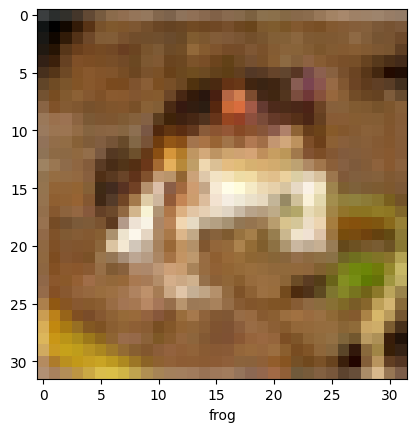

In [6]:
img_index=0
plt.figure()
plt.imshow(train_image[img_index],cmap=plt.cm.binary)
plt.xlabel(class_names[train_label[img_index][0]])
plt.show()

In [9]:
model= models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

adding dense layer

In [13]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
trained_model=model.fit(train_image,train_label,epochs=5,validation_data=(test_image,test_label))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 49ms/step - accuracy: 0.3383 - loss: 1.7882 - val_accuracy: 0.5270 - val_loss: 1.3010
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.5721 - loss: 1.2075 - val_accuracy: 0.5834 - val_loss: 1.1885
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 46ms/step - accuracy: 0.6267 - loss: 1.0580 - val_accuracy: 0.6541 - val_loss: 0.9900
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 46ms/step - accuracy: 0.6671 - loss: 0.9436 - val_accuracy: 0.6669 - val_loss: 0.9449
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 47ms/step - accuracy: 0.6969 - loss: 0.8632 - val_accuracy: 0.6787 - val_loss: 0.9163


In [17]:
test_loss,test_acc=model.evaluate(test_image,test_label,verbose=2)

313/313 - 3s - 11ms/step - accuracy: 0.6787 - loss: 0.9163


In [18]:
print(test_acc)

0.6786999702453613


data augmentation small dataset

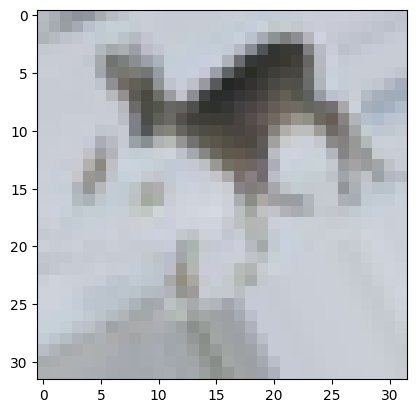

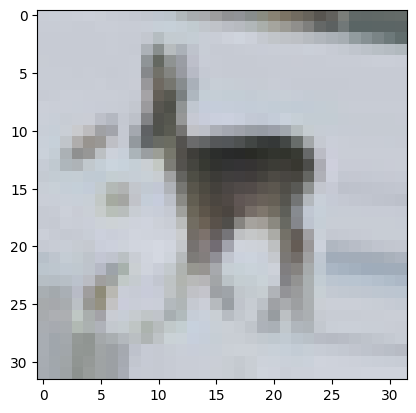

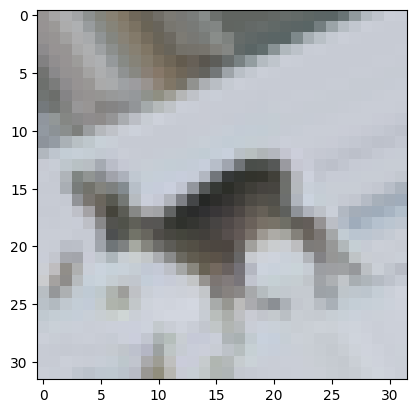

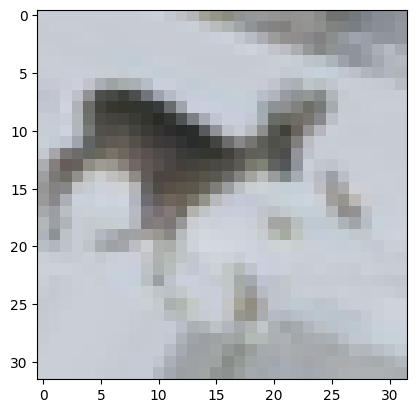

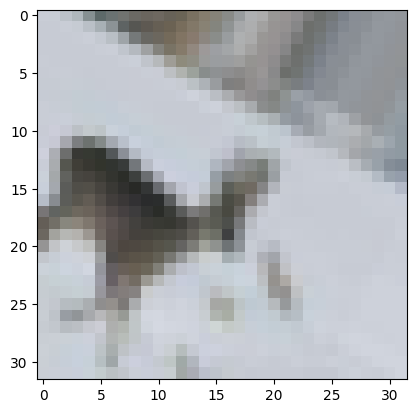

In [23]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#creates a data generator object that transform images
datagen=ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
#pick an image to transform
test_img=train_image[20]
img=image.img_to_array(test_img) #converting image to numpy array
img=img.reshape((1,)+img.shape)

i=0
for batch in datagen.flow(img,save_prefix='test',save_format='jpeg'):
  plt.figure(i)
  plot=plt.imshow(image.img_to_array(batch[0]))
  i +=1
  if i> 4:
    break
plt.show()

pretrained model and fine tuning

In [24]:
import os

In [71]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar
#splitting data manually into 80% train 10% testing,10% validation
(raw_train,raw_validation,raw_test),metadata=tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]','train[80%:90%]','train[90%:]'],
    with_info=True,
    as_supervised=True,
)

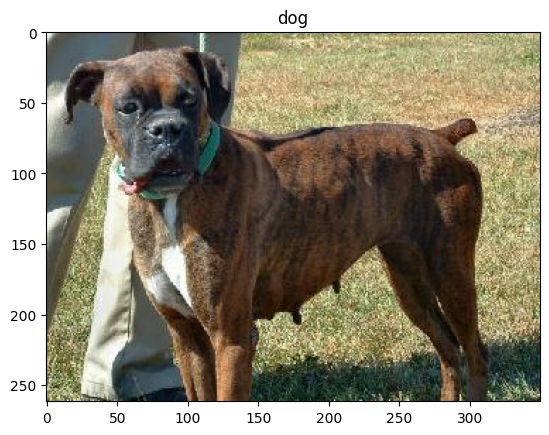

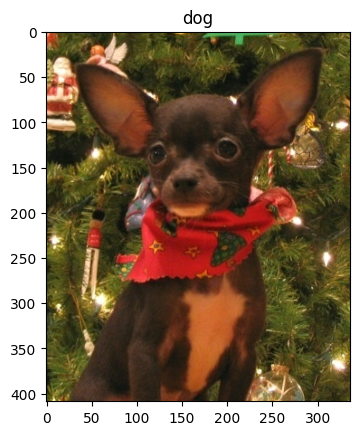

In [72]:
get_label_names=metadata.features['label'].int2str
#display image
for image,label in raw_train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_names(label))

In [127]:
#resizing images
img_size=160 #all images will be 160x160
def format_example(image,label):
  #returns reshaped image = img size
  image=tf.cast(image,tf.float32)
  image=(image/127.5)-1
  image=tf.image.resize(image,(img_size,img_size))
  return image,label


In [128]:
train=raw_train.map(format_example)
validation=raw_validation.map(format_example)
test=raw_test.map(format_example)

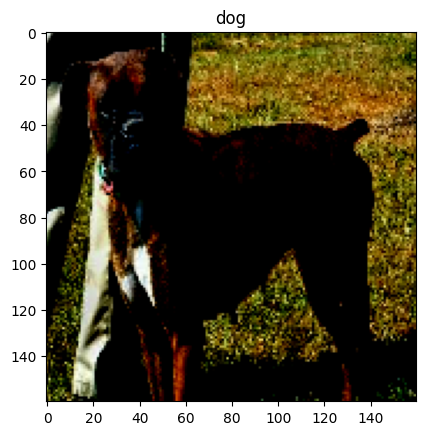

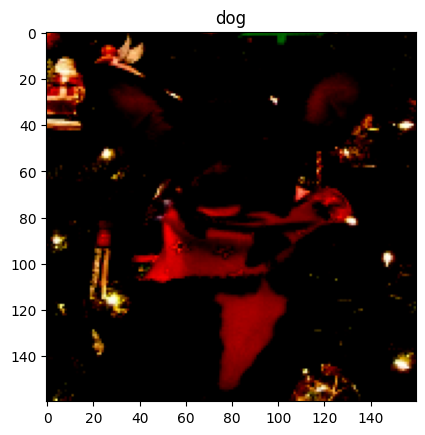

In [129]:
get_label_names=metadata.features['label'].int2str
#display image
for image,label in train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_names(label))

using pretrained model

In [76]:
imagen_shape=(img_size,img_size,3)
base_model=tf.keras.applications.MobileNetV2(input_shape=imagen_shape,
                                             include_top=False, #do we include classifier for 1000classes
                                             weights='imagenet')

In [33]:
base_model.summary()

Model: "mobilenetv2_1.00_160"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 160, 160, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 80, 80, 32)     │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 80, 80, 32)     │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 80, 80, 32)     │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 80, 80, 32)     │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 80, 80, 32)     │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 80, 80, 32)     │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 80, 80, 16)     │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 80, 80, 16)     │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 80, 80, 96)     │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 80, 80, 96)     │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 80, 80, 96)     │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 81, 81, 96)     │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 40, 40, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [77]:
for image, _ in train.take(1):
  pass
image=tf.expand_dims(image,axis=0)
feature_batch=base_model(image)
print(feature_batch.shape)


(1, 5, 5, 1280)


freezing base disabling training prpperty of a layer bc which has already learned weight

In [78]:
base_model.trainable=False
base_model.summary()

Model: "mobilenetv2_1.00_160"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 160, 160, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 80, 80, 32)     │            864 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 80, 80, 32)     │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 80, 80, 32)     │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 80, 80, 32)     │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 80, 80, 32)     │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 80, 80, 32)     │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 80, 80, 16)     │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 80, 80, 16)     │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 80, 80, 96)     │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 80, 80, 96)     │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 80, 80, 96)     │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 81, 81, 96)     │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 40, 40, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [79]:
#adding our classifier
global_average_layer=tf.keras.layers.GlobalAveragePooling2D()
#adding prediction layer
prediction_layer=tf.keras.layers.Dense(1)


In [80]:
new_model=tf.keras.Sequential([
    base_model,
    global_average_layer,
    prediction_layer
])

In [41]:
new_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_160 (Functional)    │ (None, 5, 5, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │           1,281 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [81]:
#training model
base_learning_rate=0.0001
optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate)
loss_fn=tf.keras.losses.BinaryCrossentropy(from_logits=True)
new_model.compile(
    optimizer=optimizer,
    loss=loss_fn,
    metrics=['accuracy']
)

In [82]:
train=train.batch(32)
validation=validation.batch(32)
#train = train.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
#validation = validation.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [83]:

new_model_trained=new_model.fit(
    train,
    epochs=5,
    validation_data=validation
)

Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 417s 707ms/step - accuracy: 0.8083 - loss: 0.3548 - val_accuracy: 0.9695 - val_loss: 0.0907
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 445s 764ms/step - accuracy: 0.9756 - loss: 0.0766 - val_accuracy: 0.9755 - val_loss: 0.0663
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 449s 771ms/step - accuracy: 0.9796 - loss: 0.0584 - val_accuracy: 0.9772 - val_loss: 0.0584
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 411s 704ms/step - accuracy: 0.9811 - loss: 0.0516 - val_accuracy: 0.9785 - val_loss: 0.0544
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 478s 767ms/step - accuracy: 0.9822 - loss: 0.0478 - val_accuracy: 0.9794 - val_loss: 0.0520


In [84]:
new_model.save("dog_vs_cat.h5")

In [86]:
model=tf.keras.models.load_model("dog_vs_cat.h5")
test=test.batch(32)
model.predict(test,batch_size=32,verbose=1,steps=5)

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 641ms/step


array([[ -6.519057 ],
       [  3.0354884],
       [  3.9367268],
       [ -6.7007613],
       [ -6.348681 ],
       [ -8.979119 ],
       [  6.0193534],
       [ -1.1527572],
       [ -8.806233 ],
       [ -8.096995 ],
       [  4.3769584],
       [-11.076879 ],
       [ -6.508328 ],
       [  6.878715 ],
       [-11.379534 ],
       [-10.594794 ],
       [ -4.677623 ],
       [  4.1737213],
       [ -7.946779 ],
       [  8.115854 ],
       [ -8.642619 ],
       [ -7.875792 ],
       [ -9.936482 ],
       [  8.806349 ],
       [-11.194017 ],
       [ -4.384996 ],
       [  5.955191 ],
       [  8.263516 ],
       [ -4.52014  ],
       [ -7.259375 ],
       [ -8.331706 ],
       [ -7.7177553],
       [ -5.8346276],
       [  8.750909 ],
       [ -5.002442 ],
       [ -9.532412 ],
       [ -8.408771 ],
       [ -7.317286 ],
       [ -7.849788 ],
       [-10.906692 ],
       [ -8.960285 ],
       [ -7.946112 ],
       [-11.357767 ],
       [  4.659571 ],
       [ -6.972875 ],
       [  

In [101]:

class_name=['cat','dog']

<bound method ClassLabel.int2str of ClassLabel(shape=(), dtype=int64, num_classes=2)>


prediction :[0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0]
label :['cat', 'dog']
actual label:[0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0]


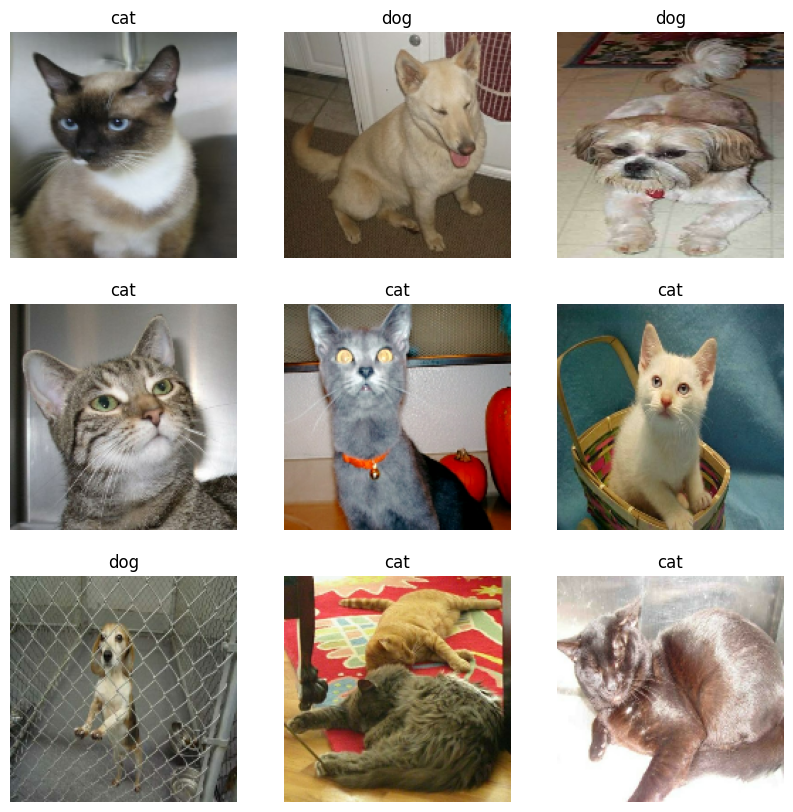

In [126]:

image_batch,label_batch=test.as_numpy_iterator().next()

prediction=model.predict_on_batch(image_batch).flatten()
prediction=tf.where(prediction <0.5,0,1)
print(f'prediction :{prediction.numpy()}')
print(f"label :{class_name}")
print(f"actual label:{label_batch}")
plt.figure(figsize=(10,10))
for i in range (9):
  ax=plt.subplot(3,3,i+1)
  new_image=(image_batch[i]+1)*127.5
  new_image=tf.cast(new_image,tf.uint8)
  plt.imshow(new_image)
  plt.title(class_name[prediction[i]])
  plt.axis("off")



